In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import re

In [148]:
df=pd.read_csv("../DataSets/baby_bonus.csv")

In [149]:
df

,seq_no,instn_code,instn_name,instn_srvc_type_cde,instn_srvc_type,instn_blk_hse_no,instn_street_name,instn_flr_no,instn_unit_no,instn_bldg_name,instn_pc,instn_ofc_no,instn_email,ap_user_name
0,201500000373,PT9160,SAFARI HOUSE PRESCHOOL YISHUN,CC,Childcare Centre,5,YISHUN INDUSTRIAL STREET 1,01,02,NORTH SPRING BIZHUB,768161,67107328,YS@ZOO-PHONICS.COM.SG,na
1,201500000372,15C0226,TSI & PARTNERS FAMILY CLINIC,HC,Healthcare Institution,151,SERANGOON NORTH AVENUE 2,01,01,na,550151,63834818,na,na
2,201500000366,SS20150009,UNITED EYECARE (BOON KENG) LLP,OS,Optical Shop,27,BENDEMEER ROAD,01,641,BENDEMEER SHOPPING MALL,330027,62978298,ueyecare@yahoo.com.sg,na
3,201500000364,YM0160,MY WORLD PRESCHOOL LTD.,CC,Childcare Centre,787B,WOODLANDS CRESCENT,01,82,na,732787,63621566,ccadm@myworld.org.sg,na
4,201500000363,YM0159,MY WORLD PRESCHOOL LTD.,CC,Childcare Centre,270,YISHUN STREET 22,01,58,na,760270,67560729,ccynl@myworld.org.sg,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,202000000079,PT9732,MILAGROS DE MONTESSORI SCHOOL - QUEENS CLOSE,KN,Kindergarten,21,QUEEN'S CLOSE,01,141,na,140021,98291020,jil@milagrosmontessori.com,na
4597,201900000538,19M0345,EIDDWEN FAMILY MEDICINE CLINIC,HC,Healthcare Institution,34,CASSIA CRESCENT,01,80,na,390034,69705818,eiddwen.clinic@gmail.com,na
4598,202000000003,PT9727,WORKPLAYZ MONTESSORI,KN,Kindergarten,88A,TELOK BLANGAH HEIGHTS,01,02,MULTI STOREY CAR PARK,101088,98378794,sychua79@gmail.com,na
4599,202000000152,20M0081,PEAK MEDICAL CLINIC & SURGERY,HC,Healthcare Institution,601B,TAMPINES AVENUE 9,01,05,TAMPINES GREENRIDGES,522601,65136326,PEAKMEDICALSG@GMAIL.COM,na


In [150]:
df.dtypes

seq_no                  int64
instn_code             object
instn_name             object
instn_srvc_type_cde    object
instn_srvc_type        object
instn_blk_hse_no       object
instn_street_name      object
instn_flr_no           object
instn_unit_no          object
instn_bldg_name        object
instn_pc                int64
instn_ofc_no           object
instn_email            object
ap_user_name           object
dtype: object

In [151]:
df.instn_srvc_type_cde.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
4596    False
4597    False
4598    False
4599    False
4600    False
Name: instn_srvc_type_cde, Length: 4601, dtype: bool

In [152]:
#df.rename=('instn_code'=='institutioncode', inplace=True)
#rename all columns

In [153]:
#df.rename(columns={'seq_no':'seqno','instn_code':'instittutioncode','instn_name':'institutionname','instn_srvc_type_cde':'institutionservicetypecode'
                 # }, inplace=True)

In [154]:
df

,seq_no,instn_code,instn_name,instn_srvc_type_cde,instn_srvc_type,instn_blk_hse_no,instn_street_name,instn_flr_no,instn_unit_no,instn_bldg_name,instn_pc,instn_ofc_no,instn_email,ap_user_name
0,201500000373,PT9160,SAFARI HOUSE PRESCHOOL YISHUN,CC,Childcare Centre,5,YISHUN INDUSTRIAL STREET 1,01,02,NORTH SPRING BIZHUB,768161,67107328,YS@ZOO-PHONICS.COM.SG,na
1,201500000372,15C0226,TSI & PARTNERS FAMILY CLINIC,HC,Healthcare Institution,151,SERANGOON NORTH AVENUE 2,01,01,na,550151,63834818,na,na
2,201500000366,SS20150009,UNITED EYECARE (BOON KENG) LLP,OS,Optical Shop,27,BENDEMEER ROAD,01,641,BENDEMEER SHOPPING MALL,330027,62978298,ueyecare@yahoo.com.sg,na
3,201500000364,YM0160,MY WORLD PRESCHOOL LTD.,CC,Childcare Centre,787B,WOODLANDS CRESCENT,01,82,na,732787,63621566,ccadm@myworld.org.sg,na
4,201500000363,YM0159,MY WORLD PRESCHOOL LTD.,CC,Childcare Centre,270,YISHUN STREET 22,01,58,na,760270,67560729,ccynl@myworld.org.sg,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,202000000079,PT9732,MILAGROS DE MONTESSORI SCHOOL - QUEENS CLOSE,KN,Kindergarten,21,QUEEN'S CLOSE,01,141,na,140021,98291020,jil@milagrosmontessori.com,na
4597,201900000538,19M0345,EIDDWEN FAMILY MEDICINE CLINIC,HC,Healthcare Institution,34,CASSIA CRESCENT,01,80,na,390034,69705818,eiddwen.clinic@gmail.com,na
4598,202000000003,PT9727,WORKPLAYZ MONTESSORI,KN,Kindergarten,88A,TELOK BLANGAH HEIGHTS,01,02,MULTI STOREY CAR PARK,101088,98378794,sychua79@gmail.com,na
4599,202000000152,20M0081,PEAK MEDICAL CLINIC & SURGERY,HC,Healthcare Institution,601B,TAMPINES AVENUE 9,01,05,TAMPINES GREENRIDGES,522601,65136326,PEAKMEDICALSG@GMAIL.COM,na


In [155]:
df.describe()

,seq_no,instn_pc
count,4.601000e+03,4601.000000
mean,1.816963e+11,480915.643121
std,5.939068e+10,210654.903547
min,2.001000e+09,18935.000000
25%,2.009000e+11,310128.000000
50%,2.013000e+11,529287.000000
75%,2.016000e+11,644660.000000
max,2.020000e+11,829734.000000


In [156]:
df.groupby(['instn_blk_hse_no']).instn_blk_hse_no.agg([len, min, max])

C:\Users\Yash Jadhao\AppData\Local\Temp\ipykernel_20984\1281480072.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df.groupby(['instn_blk_hse_no']).instn_blk_hse_no.agg([len, min, max])
C:\Users\Yash Jadhao\AppData\Local\Temp\ipykernel_20984\1281480072.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.groupby(['instn_blk_hse_no']).instn_blk_hse_no.agg([len, min, max])


,len,min,max
instn_blk_hse_no,,,
00,3,00,00
02,1,02,02
03,1,03,03
05,1,05,05
09,1,09,09
...,...,...,...
9A,1,9A,9A
9B,1,9B,9B
Blk 762,1,Blk 762,Blk 762


In [157]:
df.instn_name.unique()

array(['SAFARI HOUSE PRESCHOOL YISHUN', 'TSI & PARTNERS FAMILY CLINIC',
       'UNITED EYECARE (BOON KENG) LLP', ..., 'WORKPLAYZ MONTESSORI',
       'PEAK MEDICAL CLINIC & SURGERY',
       'UNITY BY FAIRPRICE (UWIS) WISMA ATRIA'], dtype=object)

In [158]:
df.instn_srvc_type.unique()

array(['Childcare Centre', 'Healthcare Institution', 'Optical Shop',
       'Early Intervention Programmes', 'Kindergarten', 'Pharmacy',
       'CPE Kindergarten', 'Assistive Technology Device Providers',
       'Special Education', 'Insurance'], dtype=object)

In [159]:
df.instn_srvc_type_cde.unique()

array(['CC', 'HC', 'OS', 'EI', 'KN', 'PH', 'KP', 'AT', 'SE', 'IN'],
      dtype=object)

In [160]:
df.instn_email.unique()

array(['YS@ZOO-PHONICS.COM.SG', 'na', 'ueyecare@yahoo.com.sg', ...,
       'sychua79@gmail.com', 'PEAKMEDICALSG@GMAIL.COM',
       'muwis@fairprice.com.sg'], dtype=object)

In [161]:
df.instn_ofc_no.unique

<bound method Series.unique of 0       67107328
1       63834818
2       62978298
3       63621566
4       67560729
          ...   
4596    98291020
4597    69705818
4598    98378794
4599    65136326
4600    66945104
Name: instn_ofc_no, Length: 4601, dtype: object>

In [162]:
instn_srvc_type_counts = df['instn_srvc_type'].value_counts()

In [163]:
s1=df.instn_srvc_type_cde.value_counts()

In [164]:
s1

instn_srvc_type_cde
CC    1549
HC    1505
OS     692
KN     442
PH     229
EI     131
SE      23
AT      21
KP       8
IN       1
Name: count, dtype: int64

In [165]:
pd.crosstab(index=df.instn_srvc_type_cde,columns=df.instn_srvc_type,margins=True)

instn_srvc_type,Assistive Technology Device Providers,CPE Kindergarten,Childcare Centre,Early Intervention Programmes,Healthcare Institution,Insurance,Kindergarten,Optical Shop,Pharmacy,Special Education,All
instn_srvc_type_cde,,,,,,,,,,,
AT,21,0,0,0,0,0,0,0,0,0,21
CC,0,0,1549,0,0,0,0,0,0,0,1549
EI,0,0,0,131,0,0,0,0,0,0,131
HC,0,0,0,0,1505,0,0,0,0,0,1505
IN,0,0,0,0,0,1,0,0,0,0,1
KN,0,0,0,0,0,0,442,0,0,0,442
KP,0,8,0,0,0,0,0,0,0,0,8
OS,0,0,0,0,0,0,0,692,0,0,692
PH,0,0,0,0,0,0,0,0,229,0,229


In [166]:
#df.(['institutionname']),'instn_ofc_no.unique'().tolist()

In [167]:
df.instn_email.value_counts()

instn_email
na                             406
info@myfirstskool.com          105
wjtan@guardian.com.sg           43
INFO@MYFIRSTSKOOL.COM           38
QANDM@QANDM.COM.SG              31
                              ... 
enquiry@thehearingcentre.sg      1
kuhclycos@yahoo.com.sg           1
yiauchi@gmail.com                1
spexangmokio@gmail.com           1
muwis@fairprice.com.sg           1
Name: count, Length: 3383, dtype: int64

In [168]:
me = df[df.instn_email != 'na']

In [169]:
me

,seq_no,instn_code,instn_name,instn_srvc_type_cde,instn_srvc_type,instn_blk_hse_no,instn_street_name,instn_flr_no,instn_unit_no,instn_bldg_name,instn_pc,instn_ofc_no,instn_email,ap_user_name
0,201500000373,PT9160,SAFARI HOUSE PRESCHOOL YISHUN,CC,Childcare Centre,5,YISHUN INDUSTRIAL STREET 1,01,02,NORTH SPRING BIZHUB,768161,67107328,YS@ZOO-PHONICS.COM.SG,na
2,201500000366,SS20150009,UNITED EYECARE (BOON KENG) LLP,OS,Optical Shop,27,BENDEMEER ROAD,01,641,BENDEMEER SHOPPING MALL,330027,62978298,ueyecare@yahoo.com.sg,na
3,201500000364,YM0160,MY WORLD PRESCHOOL LTD.,CC,Childcare Centre,787B,WOODLANDS CRESCENT,01,82,na,732787,63621566,ccadm@myworld.org.sg,na
4,201500000363,YM0159,MY WORLD PRESCHOOL LTD.,CC,Childcare Centre,270,YISHUN STREET 22,01,58,na,760270,67560729,ccynl@myworld.org.sg,na
5,201500000362,YM0158,MY WORLD PRESCHOOL LTD.,CC,Childcare Centre,14,ST. GEORGE'S ROAD,01,70,na,320014,62982543,ccstg@myworld.org.sg,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,202000000079,PT9732,MILAGROS DE MONTESSORI SCHOOL - QUEENS CLOSE,KN,Kindergarten,21,QUEEN'S CLOSE,01,141,na,140021,98291020,jil@milagrosmontessori.com,na
4597,201900000538,19M0345,EIDDWEN FAMILY MEDICINE CLINIC,HC,Healthcare Institution,34,CASSIA CRESCENT,01,80,na,390034,69705818,eiddwen.clinic@gmail.com,na
4598,202000000003,PT9727,WORKPLAYZ MONTESSORI,KN,Kindergarten,88A,TELOK BLANGAH HEIGHTS,01,02,MULTI STOREY CAR PARK,101088,98378794,sychua79@gmail.com,na
4599,202000000152,20M0081,PEAK MEDICAL CLINIC & SURGERY,HC,Healthcare Institution,601B,TAMPINES AVENUE 9,01,05,TAMPINES GREENRIDGES,522601,65136326,PEAKMEDICALSG@GMAIL.COM,na


In [170]:
df

,seq_no,instn_code,instn_name,instn_srvc_type_cde,instn_srvc_type,instn_blk_hse_no,instn_street_name,instn_flr_no,instn_unit_no,instn_bldg_name,instn_pc,instn_ofc_no,instn_email,ap_user_name
0,201500000373,PT9160,SAFARI HOUSE PRESCHOOL YISHUN,CC,Childcare Centre,5,YISHUN INDUSTRIAL STREET 1,01,02,NORTH SPRING BIZHUB,768161,67107328,YS@ZOO-PHONICS.COM.SG,na
1,201500000372,15C0226,TSI & PARTNERS FAMILY CLINIC,HC,Healthcare Institution,151,SERANGOON NORTH AVENUE 2,01,01,na,550151,63834818,na,na
2,201500000366,SS20150009,UNITED EYECARE (BOON KENG) LLP,OS,Optical Shop,27,BENDEMEER ROAD,01,641,BENDEMEER SHOPPING MALL,330027,62978298,ueyecare@yahoo.com.sg,na
3,201500000364,YM0160,MY WORLD PRESCHOOL LTD.,CC,Childcare Centre,787B,WOODLANDS CRESCENT,01,82,na,732787,63621566,ccadm@myworld.org.sg,na
4,201500000363,YM0159,MY WORLD PRESCHOOL LTD.,CC,Childcare Centre,270,YISHUN STREET 22,01,58,na,760270,67560729,ccynl@myworld.org.sg,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,202000000079,PT9732,MILAGROS DE MONTESSORI SCHOOL - QUEENS CLOSE,KN,Kindergarten,21,QUEEN'S CLOSE,01,141,na,140021,98291020,jil@milagrosmontessori.com,na
4597,201900000538,19M0345,EIDDWEN FAMILY MEDICINE CLINIC,HC,Healthcare Institution,34,CASSIA CRESCENT,01,80,na,390034,69705818,eiddwen.clinic@gmail.com,na
4598,202000000003,PT9727,WORKPLAYZ MONTESSORI,KN,Kindergarten,88A,TELOK BLANGAH HEIGHTS,01,02,MULTI STOREY CAR PARK,101088,98378794,sychua79@gmail.com,na
4599,202000000152,20M0081,PEAK MEDICAL CLINIC & SURGERY,HC,Healthcare Institution,601B,TAMPINES AVENUE 9,01,05,TAMPINES GREENRIDGES,522601,65136326,PEAKMEDICALSG@GMAIL.COM,na


In [171]:
#df.groupby('seqno')[['instn_srvc_type','instn_srvc_type_cde']].sum()


In [172]:
df.groupby(['instn_srvc_type','instn_srvc_type_cde'])[['instn_srvc_type']].count()

,,instn_srvc_type
instn_srvc_type,instn_srvc_type_cde,
Assistive Technology Device Providers,AT,21
CPE Kindergarten,KP,8
Childcare Centre,CC,1549
Early Intervention Programmes,EI,131
Healthcare Institution,HC,1505
Insurance,IN,1
Kindergarten,KN,442
Optical Shop,OS,692
Pharmacy,PH,229


In [173]:
h1 = df[df.instn_srvc_type == 'Healthcare Institution']

In [174]:
h1

,seq_no,instn_code,instn_name,instn_srvc_type_cde,instn_srvc_type,instn_blk_hse_no,instn_street_name,instn_flr_no,instn_unit_no,instn_bldg_name,instn_pc,instn_ofc_no,instn_email,ap_user_name
1,201500000372,15C0226,TSI & PARTNERS FAMILY CLINIC,HC,Healthcare Institution,151,SERANGOON NORTH AVENUE 2,01,01,na,550151,63834818,na,na
8,201500000282,15D0165,NOBLE DENTAL SURGERY,HC,Healthcare Institution,219,BEDOK CENTRAL,01,126,na,460219,65561126,na,na
10,201500000276,15D0161,NEUA DENTAL,HC,Healthcare Institution,321,ALEXANDRA ROAD,02,17,ALEXANDRA CENTRAL,159971,62500128,contact@neua.com.sg,na
20,201500000260,15M0156,HEALTHWAY MEDICAL CLINIC,HC,Healthcare Institution,190,LORONG 6 TOA PAYOH,02,512,na,310190,67333855,jed.wong@healthwaymedical.com,na
27,201500000343,15M0216,PANHEALTH FAMILY CLINIC,HC,Healthcare Institution,312B,SUMANG LINK,01,03,na,822312,69660595,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4591,202000000140,20M0072,AIDAN MEDICAL CLINIC,HC,Healthcare Institution,539,BEDOK NORTH STREET 3,01,623,na,460539,69707820,noriza@aidanmedical.com.sg,na
4592,202000000144,20M0069,SHERWOOD AESTHETICS,HC,Healthcare Institution,1,JALAN ANAK BUKIT,01,08,BUKIT TIMAH PLAZA,588996,na,clinic@sherwoodaesthetics.com.sg,na
4595,202000000122,20M0057,CORNERSTONE MEDICAL BIDADARI,HC,Healthcare Institution,106A,BIDADARI PARK DRIVE,01,03,na,341106,67075660,cornerstone@cornerstone-medical.com.sg,na
4597,201900000538,19M0345,EIDDWEN FAMILY MEDICINE CLINIC,HC,Healthcare Institution,34,CASSIA CRESCENT,01,80,na,390034,69705818,eiddwen.clinic@gmail.com,na


In [175]:
#h1.institutionname.unique().tolist()

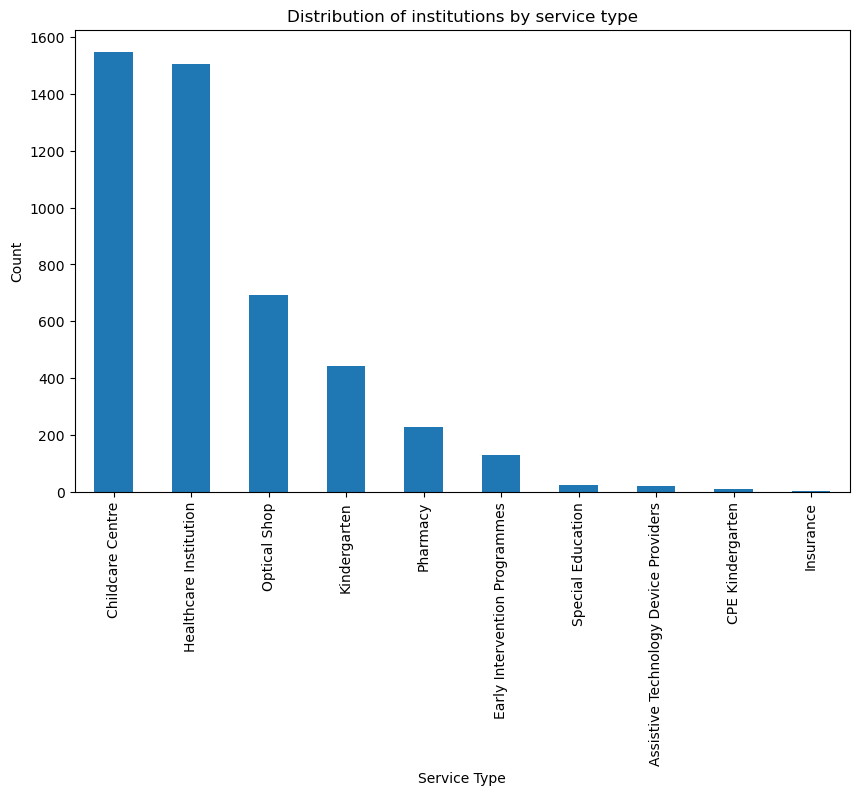

In [176]:
plt.figure(figsize=(10, 6))
instn_srvc_type_counts.plot(kind='bar')
plt.title("Distribution of institutions by service type")
plt.xlabel("Service Type")
plt.ylabel("Count")
plt.show()

In [177]:
print("Number of missing phone numbers:", df['instn_ofc_no'].isnull().sum())



Number of missing phone numbers: 0


In [179]:
invalid_phone_numbers = df['instn_ofc_no'].apply(lambda x: not re.match('^[0-9]+$', str(x)) if pd.notnull(x) else True)
print("Number of invalid phone numbers:", invalid_phone_numbers.sum())

Number of invalid phone numbers: 112


In [181]:
duplicate_phone_numbers = df['instn_ofc_no'].duplicated().sum() 
print("Number of duplicate phone numbers:", duplicate_phone_numbers)

Number of duplicate phone numbers: 581


In [182]:
print("Number of missing emails:", df['instn_email'].isnull().sum())

Number of missing emails: 0


In [184]:
invalid_emails = df['instn_email'].apply(lambda x: not re.match(r'^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+.[a-zA-Z0-9-.]+$', str(x))) 
print("Number of invalid emails:", invalid_emails.sum())

Number of invalid emails: 411


In [186]:
duplicate_emails = df['instn_email'].duplicated().sum() 
print("Number of duplicate emails:", duplicate_emails)




Number of duplicate emails: 1218


In [197]:
#plt.figure(figsize=(10, 6)) 
#df['instn_ofc_no'].plot(kind='hist') 
#plt.title("Distribution of Phone Numbers") 
#plt.xlabel("Phone Number") 
#plt.ylabel("Count") 
#plt.show()

In [198]:
#plt.figure(figsize=(10, 6))
#df['instn_ofc_no'].plot(kind='hist')
#plt.title("Distribution of Phone Numbers")
#plt.xlabel("Phone Number")

In [199]:
#plt.figure(figsize=(10, 6)) 
#df['instn_email'].plot(kind='hist') 
#plt.title("Distribution of Emails") 
#plt.xlabel("Email") 
#plt.ylabel("Count") 
#plt.show()




In [196]:
#plt.figure(figsize=(10, 6))
#plt.scatter(df['instn_ofc_no'], df['instn_email'])
#plt.title("Phone Numbers vs. Email Addresses")
#plt.xlabel("Phone Number")
#plt.ylabel("Email Address")